In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rsq

import seaborn as sns

In [2]:
data=pd.read_csv('ML Data 2.csv')

X = data.drop(['PDL Status'], axis=1)
y=data['PDL Status']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [4]:
train_data = X_train.join(y_train)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6856 entries, 8443 to 5322
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Identifier    6856 non-null   int64  
 1   ST            6856 non-null   object 
 2   Pool          6856 non-null   object 
 3   Quarter       6856 non-null   int64  
 4   Year          6856 non-null   int64  
 5   Period        6856 non-null   float64
 6   Units         6856 non-null   float64
 7   Scripts       6856 non-null   int64  
 8   Total Amount  6856 non-null   float64
 9   Market Share  6856 non-null   float64
 10  PDL Status    6856 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 900.8+ KB


array([[<Axes: title={'center': 'Identifier'}>,
        <Axes: title={'center': 'Quarter'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Period'}>,
        <Axes: title={'center': 'Units'}>,
        <Axes: title={'center': 'Scripts'}>],
       [<Axes: title={'center': 'Total Amount'}>,
        <Axes: title={'center': 'Market Share'}>,
        <Axes: title={'center': 'PDL Status'}>]], dtype=object)

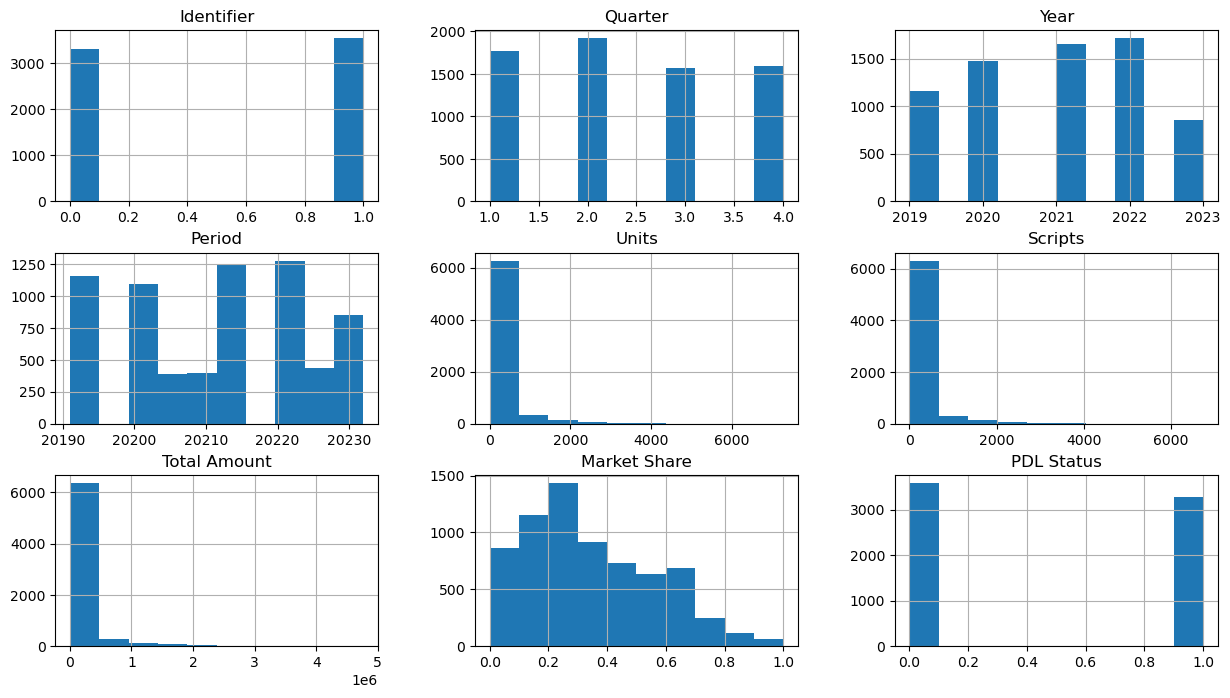

In [6]:
train_data.hist(figsize=(15,8))

<Axes: >

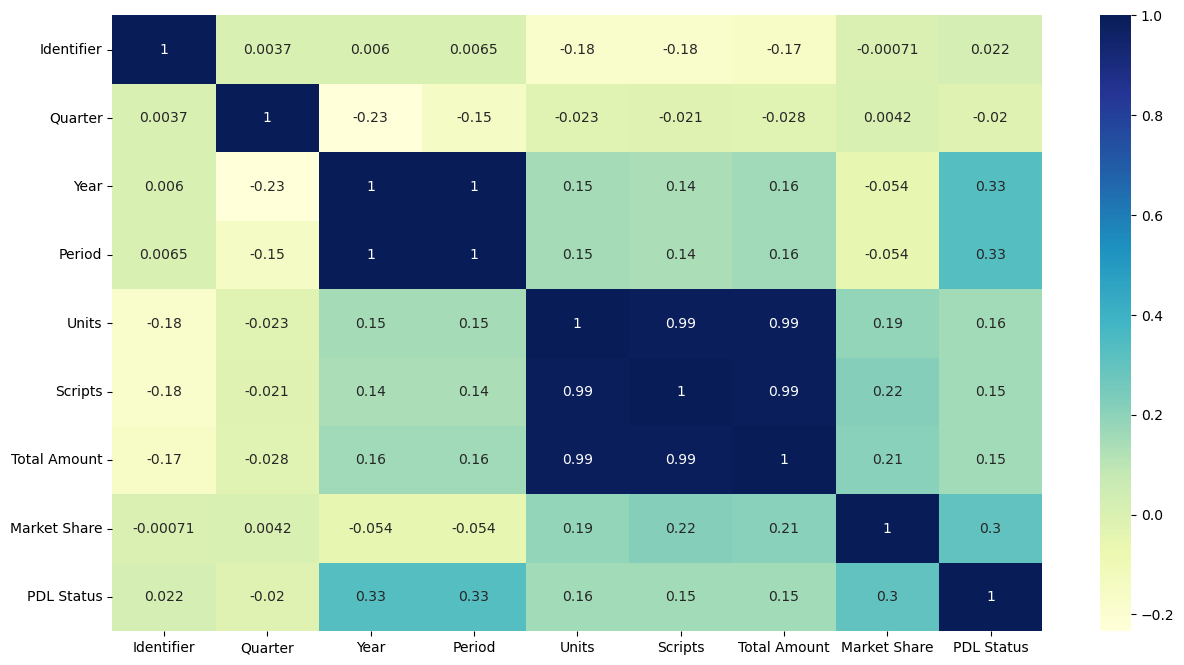

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [8]:
train_data

Identifier  ST  Pool  Quarter  Year   Period  Units  Scripts  \
8443           0  OR  SSDC        2  2023  20232.0  387.0      378   
2844           1  DC  NMPI        4  2020  20204.0    0.0        0   
8511           0  UT  SSDC        2  2023  20232.0  129.0       82   
2037           0  MN  NMPI        2  2020  20202.0  188.0      188   
3479           1  ME  SSDC        1  2021  20211.0  150.0      143   
...          ...  ..   ...      ...   ...      ...    ...      ...   
8229           0  KY  NMPI        2  2023  20232.0  883.5      532   
1397           1  WI  TOP$        4  2019  20194.0  121.5       75   
1197           0  MN  NMPI        4  2019  20194.0   60.0       53   
4876           0  DE  SSDC        4  2021  20214.0   31.5       21   
5322           1  AK  NMPI        1  2022  20221.0   61.5       37   

      Total Amount  Market Share  PDL Status  
8443     258154.58      0.235722           0  
2844          0.00      0.000000           1  
8511      62303.70      0.553648           1  
2037     113118.59      0.212644           0  
3479      89828.10      0.489768           1  
...            ...           ...         ...  
8229     412995.29      0.204486           1  
1397      45830.00      0.057604           0  
1197      34497.56      0.607401           1  
4876          0.00      0.190921           1  
5322      26391.25      0.230366           0  

[6856 rows x 11 columns]

In [9]:
train_data = train_data.join(pd.get_dummies(train_data.Pool).astype(int)).drop(['Pool'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.ST).astype(int)).drop(['ST'], axis=1)

In [10]:
test_data = X_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.Pool).astype(int)).drop(['Pool'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ST).astype(int)).drop(['ST'], axis=1)

In [11]:
X_train, y_train = train_data.drop(['PDL Status'], axis=1), train_data['PDL Status']
X_test, y_test = test_data.drop(['PDL Status'], axis=1), test_data['PDL Status']

<Axes: >

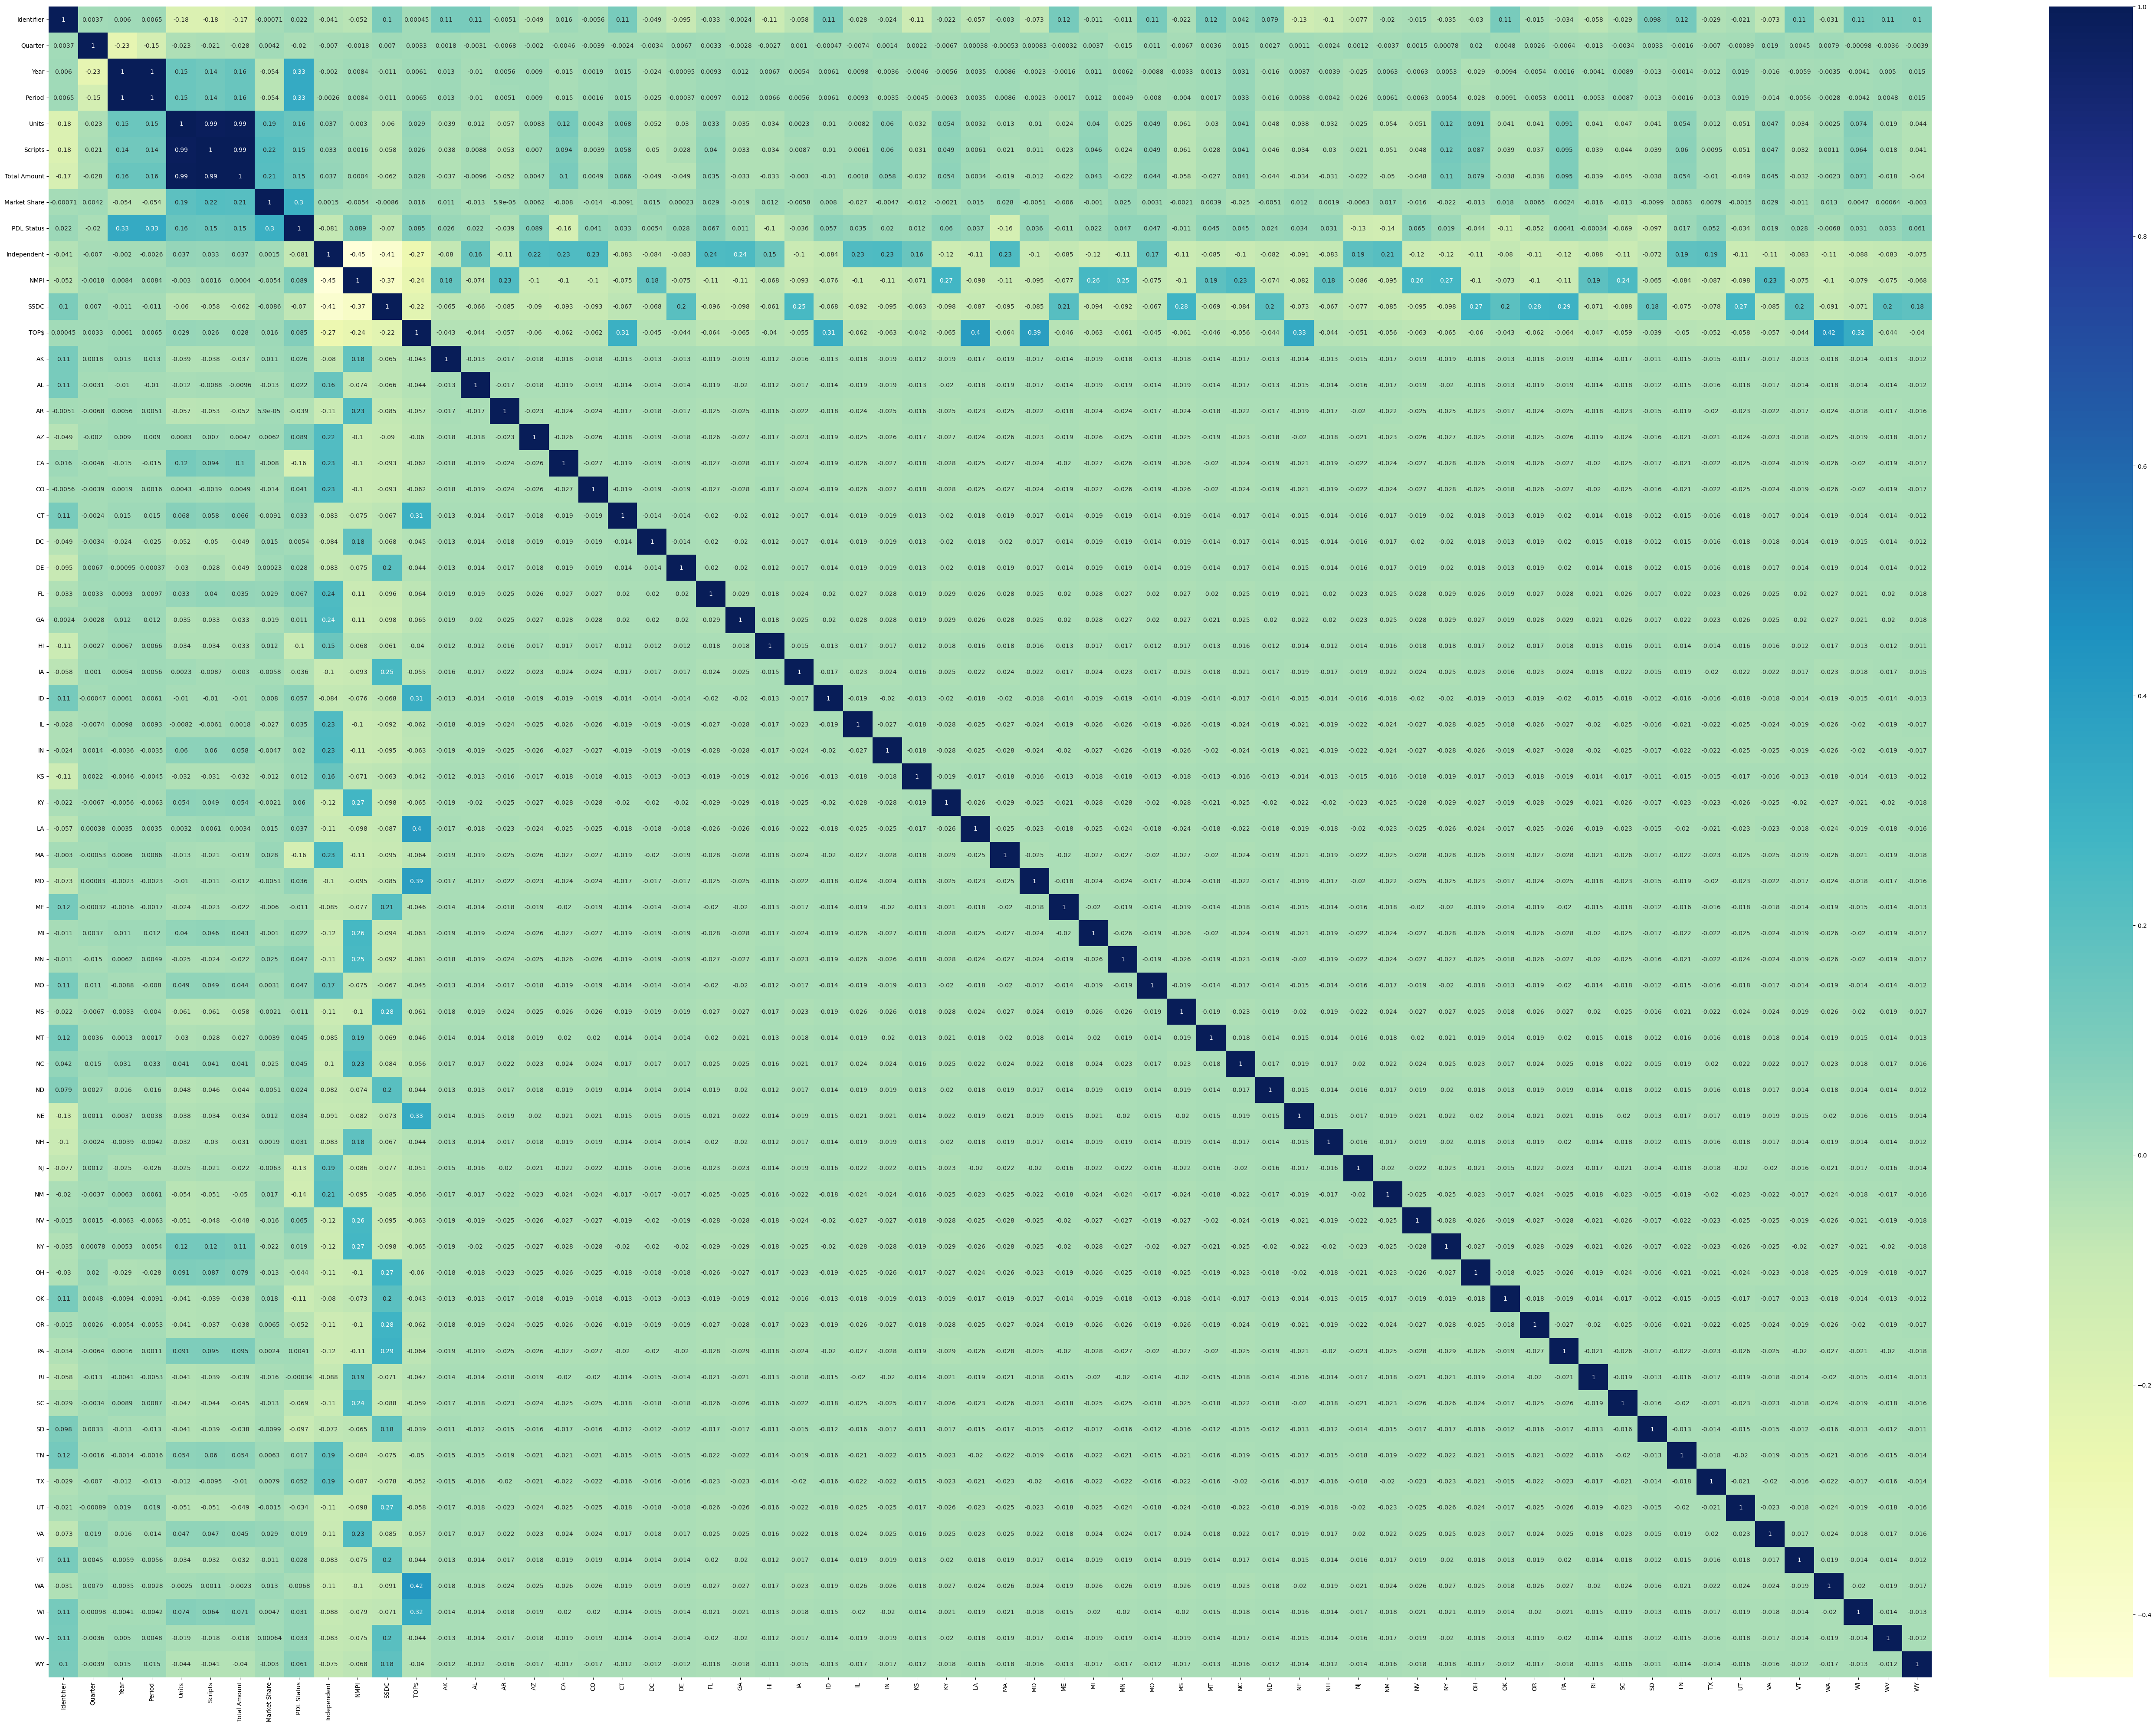

In [12]:
plt.figure(figsize=(70,50))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9428571428571428

In [29]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 75, 100],
    "max_features": [50,75,100]
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", return_train_score=True)

print(grid_search.fit(X_train, y_train))
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.score(X_test, y_test))

KeyboardInterrupt: 

In [18]:
model = RandomForestClassifier(max_features=100)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=100)

In [19]:
model.score(X_test, y_test)

0.9801749271137026